In [1]:
from lets_plot import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



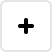
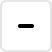
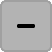
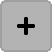
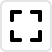
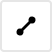
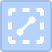
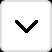
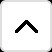
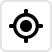
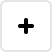
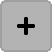
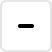
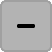
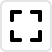
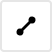
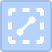
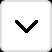
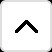
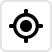

In [2]:
LetsPlot.setup_html()

##### Utils

In [3]:
# to set up a projection using a non-public parameter
from lets_plot.plot.coord import _coord as coord

p = ggplot() + xlim(-180, 180) + ylim(-90, 90) + theme(axis=element_blank())

def dump_plot(plot):
    import json
    import clipboard
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)

    clipboard.copy('')
    clipboard.copy(str(plot_json))

    return plot

In [4]:
world = geocode_countries().get_boundaries(3)

In [5]:
def draw_world_map(proj):
    return p \
        + geom_map(map=world, fill='#E0E0E0', color='#C0C0C0', size=0.5) \
        + coord('map', projection=proj) \
        + ggtitle(proj) \
        + theme(panel_grid=element_blank())
    
gggrid([
    draw_world_map('merkator'),
    draw_world_map('azimuthal'),
    draw_world_map('conic'),
])

In [6]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import MultiPolygon, Polygon, MultiLineString, LineString, LinearRing, Point, mapping

graticule = GeoDataFrame(
    data = {
        'coord': [
            LineString([(-180, 0), (0, 0), (0, 0), (180, 0)]),

            LineString([(-180, 30), (0, 30)]), LineString([(0, 30), (180, 30)]),
            LineString([(-180, -30), (0, -30)]), LineString([(0, -30), (180, -30)]),
        
            LineString([(-180, 60), (0, 60)]), LineString([(0, 60), (180, 60)]),
            LineString([(-180, -60), (0, -60)]), LineString([(0, -60), (180, -60)]),
        
            LineString([(-180, 90), (0, 90)]), LineString([(0, 90), (180, 90)]),
            LineString([(-180, -90), (0, -90)]), LineString([(0, -90), (180, -90)]),
        
            LineString([(0, -90), (0, 90)]),
            LineString([(30, -90), (30, 90)]),
            LineString([(60, -90), (60, 90)]),
            LineString([(90, -90), (90, 90)]),
            LineString([(120, -90), (120, 90)]),
            LineString([(150, -90), (150, 90)]),
            LineString([(180, -90), (180, 90)]),
        
            LineString([(-30, -90), (-30, 90)]),
            LineString([(-60, -90), (-60, 90)]),
            LineString([(-90, -90), (-90, 90)]),
            LineString([(-120, -90), (-120, 90)]),
            LineString([(-150, -90), (-150, 90)]),
            LineString([(-180, -90), (-180, 90)]),
        ]},
    geometry='coord'
)

def show_graticule(projection):
    return gggrid([
        p + geom_path() + coord('map', projection=projection) + ggtitle('Empty'),
        p + geom_path(map=graticule) + coord('map', projection=projection) + ggtitle('Graticule'),
    ])

## Mercator

In [7]:
show_graticule('mercator')

## Azimuthal

In [8]:
show_graticule('azimuthal')

## Conic

In [9]:
show_graticule('conic')

### Issues

Axis ticks and breaks looking strange

In [10]:
gggrid([
    draw_world_map('azimuthal') + theme_minimal2(),
    draw_world_map('conic') + theme_minimal2()
])